In [1]:
import random

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



random.seed()

In [2]:
df = pd.read_csv('../data/iris.csv')
df['class'] = np.where(df["class"]=="setosa",0,
                            np.where(df["class"]=="versicolor",1,2))

df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
independent_variables = df.drop('class', axis=1)
x = independent_variables.values
y = df['class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = random.randrange(99999), shuffle = True)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_train = rf_classifier.predict(x_train)
y_pred_test = rf_classifier.predict(x_test)

print('Training Accuracy {}'.format(metrics.accuracy_score(y_train, y_pred_train)))

Training Accuracy 1.0


In [4]:
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, y_pred_train, labels=[0,1,2])))

Training Confusion = 
[[41  0  0]
 [ 0 44  0]
 [ 0  0 35]]


In [5]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        35

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [6]:
print('Test Accuracy {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Test Accuracy 0.9666666666666667


In [7]:
print('Test Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_pred_test, labels=[0,1,2])))

Test Confusion = 
[[ 9  0  0]
 [ 0  5  1]
 [ 0  0 15]]


In [8]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91         6
           2       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# View the structure of the first tree in the forest
tree_0 = rf_classifier.estimators_[0]
tree_structure = export_text(tree_0, feature_names=list(df.drop('class', axis=1).columns))
print(tree_structure)

|--- petal_width <= 0.70
|   |--- class: 0.0
|--- petal_width >  0.70
|   |--- petal_width <= 1.60
|   |   |--- class: 1.0
|   |--- petal_width >  1.60
|   |   |--- sepal_length <= 5.95
|   |   |   |--- sepal_length <= 5.85
|   |   |   |   |--- class: 2.0
|   |   |   |--- sepal_length >  5.85
|   |   |   |   |--- petal_length <= 4.95
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- petal_length >  4.95
|   |   |   |   |   |--- class: 2.0
|   |   |--- sepal_length >  5.95
|   |   |   |--- class: 2.0



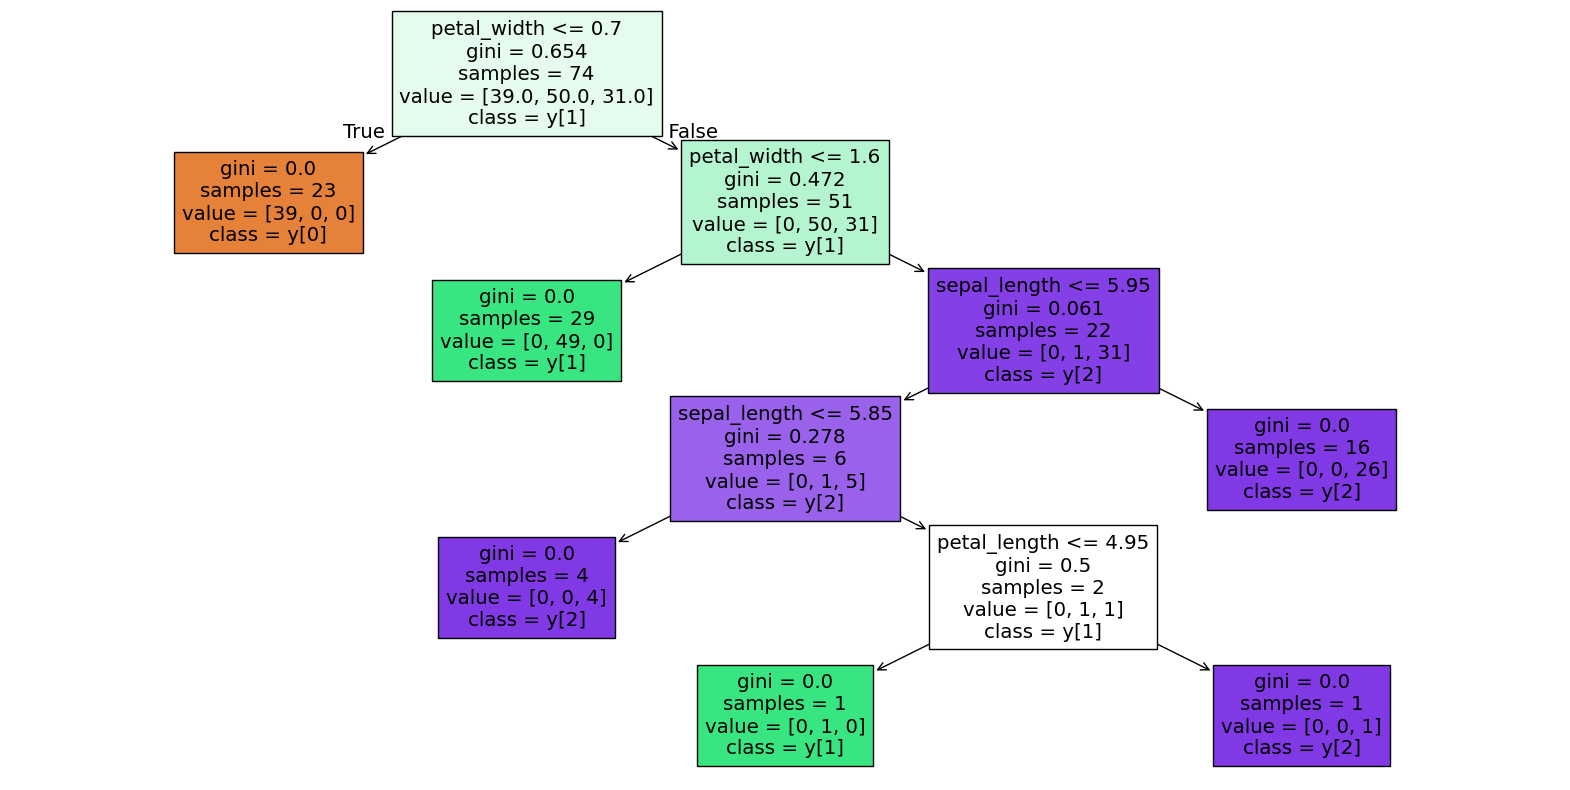

In [10]:
# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(tree_0, feature_names=list(df.drop('class', axis=1).columns), class_names=True, filled=True)
plt.show()

In [11]:
# View the structure of the last tree in the forest
tree_99 = rf_classifier.estimators_[99]
tree_structure = export_text(tree_99, feature_names=list(df.drop('class', axis=1).columns))
print(tree_structure)

|--- petal_length <= 2.70
|   |--- class: 0.0
|--- petal_length >  2.70
|   |--- petal_width <= 1.60
|   |   |--- petal_width <= 1.35
|   |   |   |--- class: 1.0
|   |   |--- petal_width >  1.35
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: 1.0
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- class: 2.0
|   |--- petal_width >  1.60
|   |   |--- petal_length <= 5.05
|   |   |   |--- sepal_length <= 6.50
|   |   |   |   |--- petal_length <= 4.85
|   |   |   |   |   |--- sepal_length <= 5.40
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- sepal_length >  5.40
|   |   |   |   |   |   |--- sepal_width <= 3.10
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- sepal_width >  3.10
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- petal_length >  4.85
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- sepal_length >  6.50
|   |   |   |   |--- class: 1.0
|   |   |--- petal_length >  5.05
|   |   |   |--- class

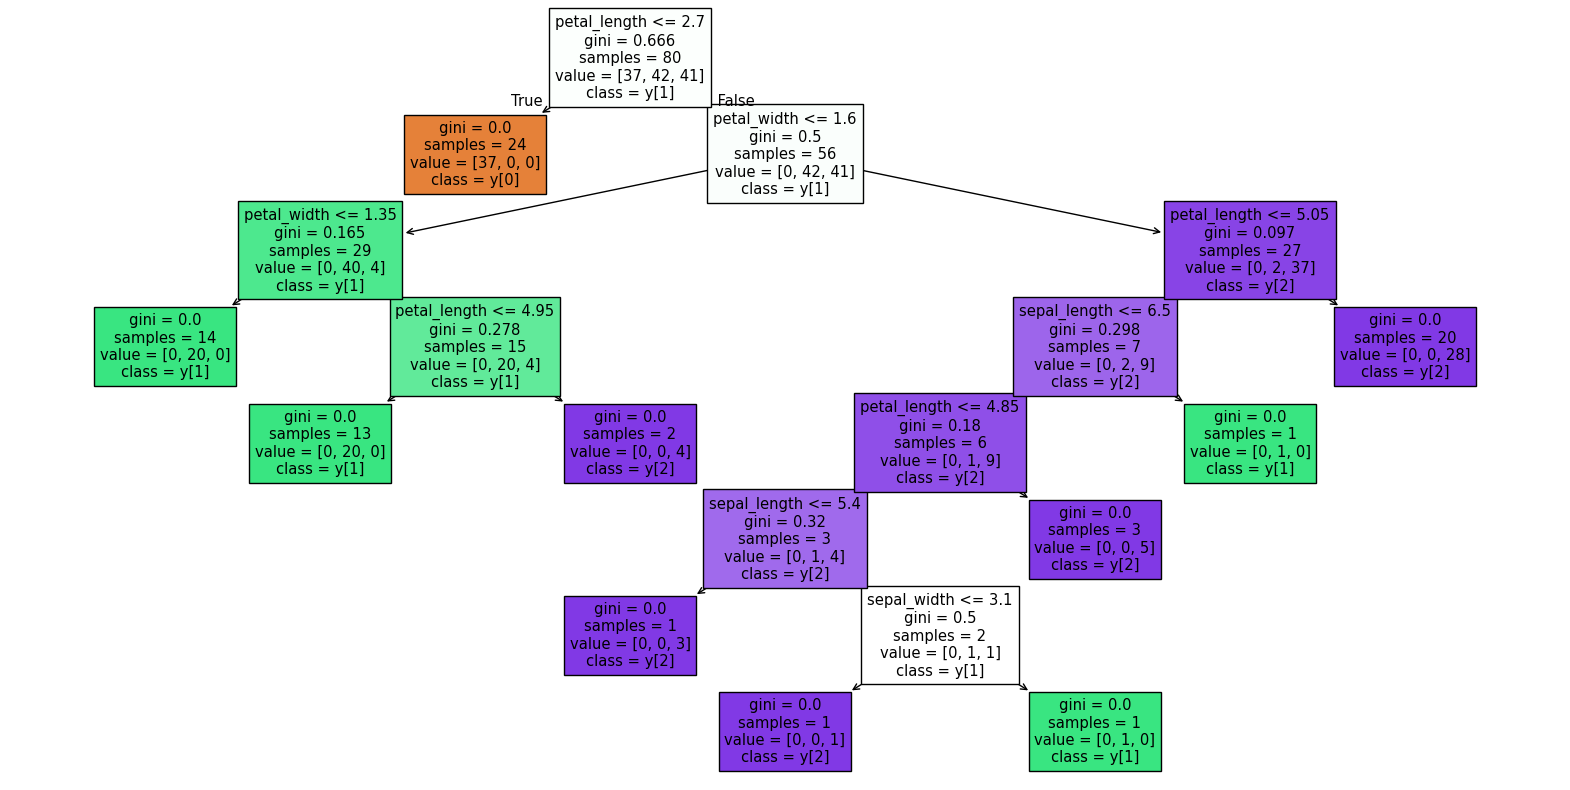

In [12]:
# Visualize the last tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(tree_99, feature_names=list(df.drop('class', axis=1).columns), class_names=True, filled=True)
plt.show()